In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sb

v = pd.read_excel('/Users/USER/Desktop/BIG_PLANILHA_RIO_historico.xlsx' , sheet_name = 'cluster_ana_2022')
v.index = v['RIO']
v = v.iloc[1,1:]
v

,Al,As(µg/mL),Cd (µg/mL),Co (µg/mL),Cr (µg/mL),Cu (µg/mL),ph,Oxi (mg/L),Vibrio (CFU/ml),Escherichia Coli (NMP/100ml),Coliformes Total (NMP/100ml),Pb (µg/mL),Turbidez,Fe (µg/mL),P (µg/mL),COD (mg/L),NT (mg/L)
RIO,,,,,,,,,,,,,,,,,
Bracui,0.252548,0.004108,0.000080,0.000448,0.002200,0.002152,6.362857,5.131429,13.50,221.200000,4567.842857,0.072600,5.658571,1.145748,0.10696,10.806512,0.618119
Jacuecanga,0.123580,0.004370,0.000081,0.000389,0.001271,0.002102,6.491429,5.320000,835.75,138192.214286,138584.128571,0.071600,13.182857,56.070987,1.00680,26.531143,2.286698
Rio do Meio,0.176619,0.004181,0.000226,0.001401,0.002045,0.006404,6.581429,4.761429,397.75,30129.057143,91175.128571,0.086600,3.678571,286.760593,1.04696,17.310714,0.583450
Perequeaçu,0.166834,0.004170,0.000075,0.000469,0.001217,0.001032,6.558571,5.260000,31.75,666.142857,3923.685714,0.063400,4.412857,511.872547,0.51136,10.893510,0.395546
Mambucaba,0.104181,0.004145,0.000080,0.000385,0.000737,0.001621,6.465714,5.237143,49.00,4552.671429,35785.400000,0.279533,4.970000,25.193067,0.71000,17.241595,0.525407
Frade,0.075408,0.004226,0.000075,0.000363,0.001184,0.001404,6.215714,5.047143,13.50,398.457143,1957.628571,0.067400,7.695714,3.007480,0.13896,41.524969,0.377569
Jacareí,0.059199,0.004100,0.000072,0.000361,0.001079,0.001404,6.424286,4.921429,55.75,1510.957143,37890.071429,0.065600,6.751429,1.150000,0.05096,21.677381,1.262798
Centro de Angra,0.228966,0.004193,0.000083,0.000513,0.001293,0.002263,6.368571,4.694286,2001.50,97561.285714,138454.357143,0.078600,6.113429,0.744912,0.21020,44.860000,5.129470
Fazenda Roque,0.048167,0.004140,0.000080,0.000498,0.000920,0.001905,6.405714,4.425857,39.00,126.585714,2970.485714,0.073400,9.960143,2.728200,0.08896,9.184762,0.829837


In [5]:
#Perform PCA
X = v.values
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X1 = pca.transform(X)
#X1.to_excel(r'C:\Users\USER\Desktop\uh.xlsx', index=True)
df = pd.DataFrame(X1, columns=['PC1', 'PC2'])
df = df/1000000
df
#df.to_excel(r'C:\Users\USER\Desktop\pca.xlsx', index=True)

In [6]:

#K-means + dendograma (geral, completo em outro pynb)
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
#X = v.values - já foi gerado lá em cima

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(df)
kmeans.labels_
#plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
df['cluster'] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centers


C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2
0,-0.049963,-0.007593
1,0.129458,-0.007436
2,0.036159,0.027739
3,-0.022631,0.012549


C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

<Axes: xlabel='PC1', ylabel='PC2'>

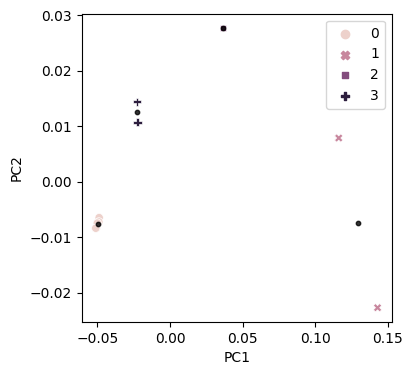

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sb.scatterplot(x='PC1', y='PC2', hue='cluster', style='cluster', ax=ax, data=df)
#sb.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
centers.plot.scatter(x='PC1', y='PC2', ax=ax, s=10, color='black', alpha=0.8)

Text(0, 0.5, 'distance')

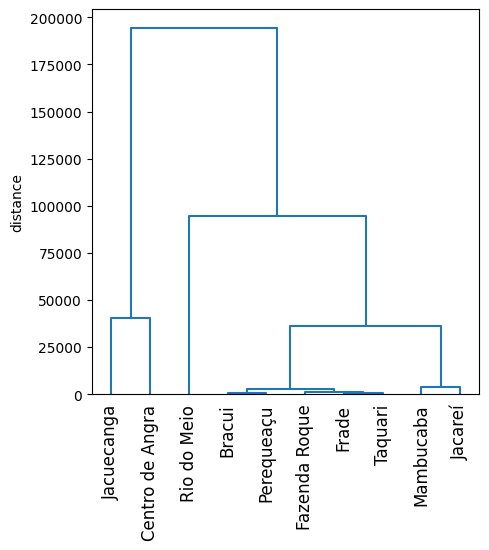

In [10]:
W = linkage(v, method='complete')
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(W, labels=v.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [6]:
#Example 3.21 Semi-supervised Learning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sb

t = pd.read_excel('/Users/USER/Desktop/BIG_PLANILHA_RIO_historico.xlsx' , sheet_name = 'cluster_ana_2022')
t.index = t['RIO']
t = t.iloc[:,1:]
T = t.values
#y = de verdade
labels = np.array([0,0,0,-1,-1,-1,-1,-1,-1,-1])
#labels[0] = 0
#labels[-1] = 1
print(labels)

label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(T, labels)
output_labels = label_spread.transduction_
print(output_labels)

[ 0  0  0 -1 -1 -1 -1 -1 -1 -1]
[0 0 0 0 0 0 0 0 0 0]


In [12]:
#classificação
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
v = pd.read_excel('/Users/USER/Desktop/BIG_PLANILHA_RIO_historico.xlsx' , sheet_name = 'cluster_ana_2022')
v.index = v['RIO']
td = v.iloc[1:8,1:]
fra = v.iloc[5,1:]
jac = v.iloc[6,1:]
cen = v.iloc[7,1:]
roq = v.iloc[8,1:]
taq = v.iloc[9,1:]
#v['IQA'] = ['boa','medio','ruim','medio','medio']
X = td.values
#Example 3.1 Python SVM Classifications
from sklearn import svm

y = [0, 1,2, 1,1, 1,1] 
clf0 = svm.SVC()
clf0.fit(X, y)
#Predict 
svc = clf0.predict([fra.values, jac.values, cen.values, roq.values, taq.values])
print('svc', svc)

#Example 3.7 Naive Bayes Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#X, y = load_iris(return_X_y=True)
#print(X)
clf1 = GaussianNB()
clf1.fit(X, y)
nb = clf1.predict([fra.values, jac.values, cen.values, roq.values, taq.values])
print('nb',nb)
#Example 3.8 LinearDiscriminantAnalysis Classification
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#print(X)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X, y)
print('ld', clf2.predict([fra.values, jac.values, cen.values, roq.values, taq.values]))
#Example 3.11 Decision Tree Classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
#y_pred = clf3.predict(X_test)
#N = y_test.shape[0]
#C = (y_test == y_pred).sum()
#print("Total points: %d Correctly labeled points : %d" %(N,C))
print('dt', clf3.predict([fra.values, jac.values, cen.values, roq.values, taq.values]))
#Example 3.12 Random Forest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.5, random_state=0)
clf4 = RandomForestClassifier()
clf4.fit(X_train_1, y_train_1)
#y_pred = clf.predict(X_test)
#print("Total points: %d Correctly labeled points : %d" %(y_test.
#shape[0],(y_test == y_pred).sum()))
print('rf', clf4.predict([fra.values, jac.values, cen.values, roq.values, taq.values]))
#Example 3.13 K-Nearest Neighbors Classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.5, random_state=0)
clf5 = KNeighborsClassifier(n_neighbors=1)
clf5.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#rint("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == y_pred).sum()))
print('knn', clf5.predict([fra.values, jac.values, cen.values, roq.values, taq.values]))
from sklearn.neural_network import MLPClassifier
clf7 = MLPClassifier(alpha=1, max_iter=1000)
clf7.fit(X_train, y_train)
print('nn', clf7.predict([fra.values, jac.values, cen.values, roq.values, taq.values]))


svc [1 1 1 1 1]
nb [1 1 1 1 1]
ld [1 1 1 1 0]
dt [1 1 0 0 0]
rf [1 1 1 1 1]
knn [1 1 0 1 1]


C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


TypeError: ufunc 'expit' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
test_size = 0.20
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed)

# Parâmetros
num_folds = 2
scoring = 'accuracy'
# Criação dos modelos
models = []
#models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2))))

np.random.seed(1) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledMLP', Pipeline([
    ('Scaler', StandardScaler()),
    ('MLP', MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2)))])))
pipelines.append(('ScaledKNN', Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([
    ('Scaler', StandardScaler()),
    ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([
    ('Scaler', StandardScaler()),
    ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([
    ('Scaler', StandardScaler()),
    ('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 442, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1124, in _validate_input
    self._label_binarizer.fit(y)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\preprocessing\_label.py", line 306, in fit
    self.classes_ = unique_labels(y)
                    ^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\utils\multiclass.py", line 105, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([0.00013003647657974617, 0.0], dtype=object),)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 442, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1124, in _validate_input
    self._label_binarizer.fit(y)
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\preprocessing\_label.py", line 306, in fit
    self.classes_ = unique_labels(y)
                    ^^^^^^^^^^^^^^^^
  File "C:\Users\USER\projeto1\Lib\site-packages\sklearn\utils\multiclass.py", line 105, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([0.0, 0.0], dtype=object),)


In [13]:
#Example 3.14 Comparison of Different Classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
names = [ "SVM", "Naive Bayes", "LDA","QDA", "Decision Tree", "Random Forest","Nearest Neighbors", "Neural Networks"]
classifiers = [
    SVC(),
    GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), DecisionTreeClassifier(), RandomForestClassifier(), 
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name +": " + str(score))

SVM: 0.5
Naive Bayes: 0.75
LDA: 0.5


ValueError: y has only 1 sample in class 0, covariance is ill defined.